In [1]:
import geopandas as gpd

In [2]:
from typing import Tuple

import pySBB

def get_fastest_trip(
    to_latitude: float,
    to_longitude: float,
    from_station: str ="Basel SBB",
    date: str = "2023-10-21",
    time: str = "09:00"
) -> Tuple[str, float]:
    to_station = pySBB.get_locations(
        x=to_latitude,
        y=to_longitude,
        type="station"
    )

    if len(to_station) == 0:
        raise ValueError("no stations found")

    # get the closest station
    station_distances = [station.distance for station in to_station]
    min_distance_index = np.argmin(station_distances)
    closest_station = to_station[min_distance_index].name
    
    connections = pySBB.get_connections(
        from_station,
        closest_station,
        limit=5,
        date=date,
        time=time
    )
    
    # connection times in seconds
    connection_times = [
        trip.duration.seconds for trip in connections
    ]

    if len(connection_times) == 0:
        raise ValueError("no valid connections")
    
    # get the fastest trip
    fastest_trip_index = np.argmin(connection_times)
    fastest_trip_time = connection_times[fastest_trip_index]

    return closest_station, fastest_trip_time


In [3]:
# import json
# import urllib.request

# def read_geojson(url):
#     with urllib.request.urlopen(url) as url:
#         jdata = json.loads(url.read().decode())
#     return jdata 


In [4]:
# swiss_url = 'https://raw.githubusercontent.com/empet/Datasets/master/swiss-cantons.geojson'
# jdata = read_geojson(swiss_url)


In [5]:
import geopandas
df = geopandas.read_file("swiss_map.geojson")
df.head()

,id,name,geometry
0,ZH,Zürich,"POLYGON ((8.80761 47.22089, 8.79264 47.22288, ..."
1,BE,Bern/Berne,"MULTIPOLYGON (((7.82457 47.26587, 7.82457 47.2..."
2,LU,Luzern,"POLYGON ((8.04867 46.78782, 8.04685 46.78683, ..."
3,UR,Uri,"POLYGON ((8.93464 46.91997, 8.94280 46.90982, ..."
4,SZ,Schwyz,"POLYGON ((8.56900 46.98983, 8.54269 46.97988, ..."


In [6]:
import numpy as np

n_points = 30

# get min/max bounds
min_x = df.bounds["minx"].min()
min_y = df.bounds["miny"].min()

max_x = df.bounds["maxx"].max()
max_y = df.bounds["maxy"].max()

# get the coordinates for each axis
x_coordinates = np.linspace(
    min_x, max_x, num=n_points
)
y_coordinates = np.linspace(
    min_y,
    max_y,
    num=n_points
)

# make the grid data
x_values, y_values = np.meshgrid(x_coordinates, y_coordinates)
coordinates = np.vstack([x_values.ravel(), y_values.ravel()]).T

In [8]:
positions_to_keep = []

for position in coordinates:
    # check if inside of switzerland
    geometry = geopandas.points_from_xy(
        x=[position[0]],
        y=[position[1]]
    )

    point_in_switzerland = False
    for _, canton in df.iterrows():
        shape = canton[2]
        point_in_canton = shape.contains(geometry)
        if point_in_canton:
            point_in_switzerland = True
            break

    if point_in_switzerland:
        positions_to_keep.append(position)

print(len(positions_to_keep))

/var/folders/hd/p540nk9s5cl9tcwdzjg2flnh0000gr/T/ipykernel_76886/542586436.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shape = canton[2]


450


In [9]:
from tqdm.notebook import tqdm

stations = []
times = []
latitudes=[]
longitudes = []

for i, position in enumerate(positions_to_keep):
    print(i)
    try:
        station, time = get_fastest_trip(
            to_longitude = float(position[0]),
            to_latitude = float(position[1])
        )
    except ValueError:
        print("hi")
        continue
    
    stations.append(station)
    times.append(time)
    longitudes.append(position[0])
    latitudes.append(position[1])

0
hi
1
hi
2
hi
3
hi
4
hi
5
hi
6
hi
7
hi
8
hi
9
hi
10
hi
11
hi
12
hi
13
hi
14
hi
15
hi
16
hi
17
hi
18
hi
19
hi
20
hi
21
hi
22
hi
23
hi
24
hi
25
hi
26
hi
27
hi
28
hi
29
hi
30
hi
31
hi
32
hi
33
hi
34
hi
35
hi
36
hi
37
hi
38
hi
39
hi
40
hi
41
hi
42
hi
43
hi
44
hi
45
hi
46
hi
47
hi
48
hi
49
hi
50
hi
51
hi
52
hi
53
hi
54
hi
55
hi
56
hi
57
hi
58
hi
59
hi
60
hi
61
hi
62
hi
63
hi
64
hi
65
hi
66
hi
67
hi
68
hi
69
hi
70
hi
71
hi
72
hi
73
hi
74
hi
75
hi
76
hi
77
hi
78
hi
79
hi
80
hi
81
hi
82
hi
83
hi
84
hi
85
hi
86
hi
87
hi
88
hi
89
hi
90
hi
91
hi
92
hi
93
hi
94
hi
95
hi
96
hi
97
hi
98
hi
99
hi
100
hi
101
hi
102
hi
103
hi
104
hi
105
hi
106
hi
107
hi
108
hi
109
hi
110
hi
111
hi
112
hi
113
hi
114
hi
115
hi
116
hi
117
hi
118
hi
119
hi
120
hi
121
hi
122
hi
123
hi
124
hi
125
hi
126
hi
127
hi
128
hi
129
hi
130
hi
131
hi
132
hi
133
hi
134
hi
135
hi
136
hi
137
hi
138
hi
139
hi
140
hi
141
hi
142
hi
143
hi
144
hi
145
hi
146
hi
147
hi
148
hi
149
hi
150
hi
151
hi
152
hi
153
hi
154
hi
155
hi
156
hi
157
hi
158


In [10]:
import pandas as pd

longitude = np.array(longitudes)
latitude = np.array(latitudes)
# longitude = np.array(np.array(positions_to_keep)[:, 0])
# latitude = np.array(np.array(positions_to_keep)[:, 1])

mean_longitude = longitude.mean()
mean_latitude = latitude.mean()

distance = np.sqrt(
    (latitude - mean_latitude)**2 + (longitude - mean_longitude)**2
)

# assemble into dataframe
transit_times_df = pd.DataFrame(
    {
        "latitude": latitude,
        "longitude": longitude,
        "time": times,
        "distance": distance,
        "station": stations
    }
    
)

print(len(transit_times_df))
transit_times_df.head()


0


/var/folders/hd/p540nk9s5cl9tcwdzjg2flnh0000gr/T/ipykernel_76886/2084682971.py:8: RuntimeWarning: Mean of empty slice.
  mean_longitude = longitude.mean()
/Users/kyamauch/mambaforge/envs/sbb-transit-map/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/hd/p540nk9s5cl9tcwdzjg2flnh0000gr/T/ipykernel_76886/2084682971.py:9: RuntimeWarning: Mean of empty slice.
  mean_latitude = latitude.mean()


,latitude,longitude,time,distance,station


In [11]:
transit_times_df.to_csv("preliminary_times_2.csv")

ValueError: x and y arrays must have a length of at least 3

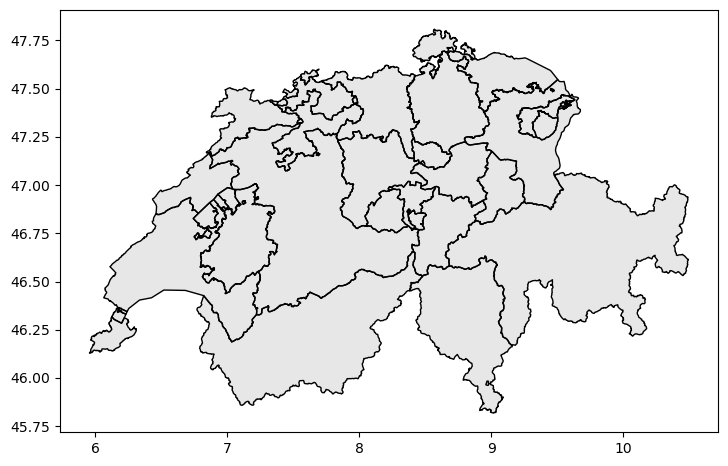

In [12]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(1, 1, figsize=(8.5, 11))

df.plot(facecolor=(0.1, 0.1, 0.1, 0.1), edgecolor="black", ax=ax)

# add the time points
ax.scatter(
    x=transit_times_df['longitude'],
    y=transit_times_df['latitude'],
    c=transit_times_df['distance'],
    # vmin=0,
    # vmax=21600
)

# ax.tricontour(
#     transit_times_df['longitude'],
#     transit_times_df['latitude'],
#     transit_times_df['time'],
#     levels=14,
#     linewidths=0.5,
#     colors='k'
# )
cntr_f = ax.tricontourf(
    transit_times_df['longitude'],
    transit_times_df['latitude'],
    transit_times_df['distance'],
    levels=14,
    cmap="viridis",
    alpha=0.5,
    # vmin=0,
    # vmax=21600
)

ax.set_xlim((5.8,10.8))
ax.set_ylim((45.7, 47.9))
# f.colorbar(cntr_f, cax=axs[1])
# ax.set_axis_off();

1.0166666666666666

In [23]:
# import plotly.express as px

# fig = px.choropleth_mapbox(df, geojson=jdata, 
#           featureidkey='properties.id',
#           locations='canton-id',
#           color='2018',
#         color_continuous_scale  ='algae_r',      
                          
#           zoom=5.5,
#           center={'lat': 46.8181877 , 'lon':8.2275124 },
#           mapbox_style='carto-positron')

# fig.add_scattermapbox(
#     lat = transit_times_df['latitude'],
#     lon = transit_times_df['longitude'],
#     mode = 'markers',                             
#     marker_size=5, marker_color='rgb(235, 0, 100)'
# )

# fig.update_layout(
#     title_text='', #title,
#     title_x=0.5,
#     coloraxis_reversescale=True,
#     #coloraxis_colorscale=algae  #'Viridis',
#     );
# fig.show()

(400, 2)

In [ ]:
# import plotly.graph_objects as go

# import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
# df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

# fig = go.Figure(
#     data=go.Scattergeo(
#         lon = transit_times_df['longitude'],
#         lat = transit_times_df['latitude'],
#         mode = 'markers',
#         marker_color = transit_times_df['time'],
#     ),
# )

# fig.update_geos(
#     visible=False, resolution=50, scope="europe",
#     showcountries=True, countrycolor="Black",
#     showsubunits=True, subunitcolor="Blue"
# )

# fig.show()